In [ ]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
PROCESSED_EQUITIES_DIR = PROJECT_ROOT / "data" / "processed" / "equities"
prices = pd.read_parquet(PROCESSED_EQUITIES_DIR / "prices.parquet")

In [ ]:
TEST_DAYS = 356

start_date = prices["date"].min()
end_date = prices["date"].max()

test_start = end_date - pd.Timedelta(days=TEST_DAYS)
test_prices = prices[prices["date"] >= test_start].copy()

print(test_prices.head())

In [ ]:
import numpy as np

def trade_as_monkey(df, p_trade, seed):

    # Copy df object to not alter original
    df = df.copy()

    # Initialize empty position and action arrays
    n = len(df)
    position = np.zeros(n, dtype=int)
    action = np.empty(n, dtype=object)

    rng = np.random.default_rng(seed)

    # Set values for day 1
    position[0] = 0
    action[0] = "start"

    for i in range(1, n):

        # Currently flat, maybe buy
        if position[i-1] == 0:
            if rng.random() < p_trade:
                position[i] = 1
                action[i] = "buy"
            else:
                position[i] = 0
                action[i] = "hold"
        
        # Currently long, maybe sell
        else:
            if rng.random() < p_trade:
                position[i] = 0
                action[i] = "sell"
            else:
                position[i] = 1
                action[i] = "hold"

    df["position"] = position
    df["action"] = action
    df["strategy_return"] = df["position"].shift(1).fillna(0) * df["pct_change"]

    return df



In [ ]:
BASE_SEED = 42
p_trade= 0.5

test_prices = test_prices.sort_values(["ticker", "date"])

monkey_trades = (
    test_prices
    .groupby("ticker", group_keys=True)
    .apply(lambda df: trade_as_monkey(
        df,
        p_trade,
        seed=BASE_SEED
    ))
)

print(monkey_trades.head())

In [ ]:
import matplotlib.pyplot as plt

# equal-weighted daily return across tickers
daily_portfolio_ret = (
    monkey_trades
    .groupby("date")["strategy_return"]
    .mean()
    .sort_index()
)

portfolio_return = (1 + daily_portfolio_ret).cumprod() -1

plt.figure(figsize=(10, 4))
plt.plot(portfolio_return.values)
plt.title("Monkey portfolio return curve (equal-weighted across tickers)")
plt.xlabel("Days")
plt.ylabel("% Return")
plt.axhline()
plt.show()

C:\Users\axelz\AppData\Local\Temp\ipykernel_23784\426262185.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: trade_as_monkey(
C:\Users\axelz\AppData\Local\Temp\ipykernel_23784\426262185.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: trade_as_monkey(
C:\Users\axelz\AppData\Local\Temp\ipykernel_23784\426262185.py:8: FutureWarning: DataFrameGroupBy.apply operated on the groupi

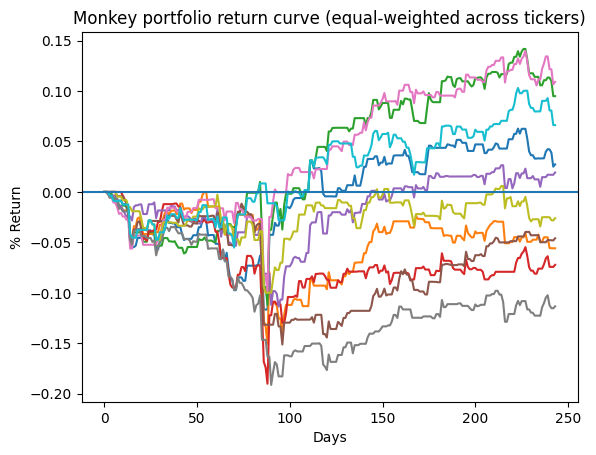

In [88]:
troop = 10

for i, monkey in enumerate(range(troop)):

    monkey_trades = (
    test_prices
    .groupby("ticker", group_keys=True)
    .apply(lambda df: trade_as_monkey(
        df,
        p_trade,
        seed=BASE_SEED + i
        ))
    )

    daily_portfolio_ret = (
    monkey_trades
    .groupby("date")["strategy_return"]
    .mean()
    .sort_index()
    )   
    
    portfolio_return = (1 + daily_portfolio_ret).cumprod() -1

    plt.plot(portfolio_return.values)

plt.title("Monkey portfolio return curve (equal-weighted across tickers)")
plt.xlabel("Days")
plt.ylabel("% Return")
plt.axhline()
plt.show()